## Import libraries

In [1]:
#pip install pandas-profiling

In [2]:
import pandas as pd
import numpy as np
#from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import missingno as msno
import seaborn as sns
from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from scipy.spatial.distance import pdist


In [3]:
cd /content/drive/MyDrive/Building Energy Benchmark 2021

/content/drive/MyDrive/Building Energy Benchmark 2021


## Read Dataset

About Dataset : Seattle’s Building Energy Benchmarking Program (SMC 22.920) requires owners of non-residential and multifamily buildings (20,000 square feet or larger) to track energy performance and annually report to the City of Seattle. Annual benchmarking, reporting and disclosing of building performance are foundational elements of creating more market value for energy efficiency.

Per Ordinance (125000), starting with 2015 energy use performance reporting, the City of Seattle is making the data for all building 20,000 SF and larger available annually. This dataset contains all 2021 buildings required to report.

Data is taken from : Source [https://data.seattle.gov/Community/2021-Building-Energy-Benchmarking/bfsh-nrm6]

In [4]:
ls

'2021 Building Energy Benchmark'         output.html
 2021_Building_Energy_Benchmarking.csv


In [5]:
data = pd.read_csv('2021_Building_Energy_Benchmarking.csv')

## Exploratory Analysis

In [6]:
# Create profiling report
# No need to run this cell multiple times as the report has been generated and saved
#prof = ProfileReport(data)

In [7]:
# Save the profiling report in the drive
#prof.to_file(output_file='output.html')

## Data Preprocessing

In [8]:
data.head()

,OSEBuildingID,DataYear,BuildingName,BuildingType,TaxParcelIdentificationNumber,Address,City,State,ZipCode,Latitude,...,ThirdLargestPropertyUseTypeGFA,Electricity(kWh),SteamUse(kBtu),NaturalGas(therms),ComplianceStatus,ComplianceIssue,Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
0,1,2021,MAYFLOWER PARK HOTEL,NonResidential,659000030,405 OLIVE WAY,SEATTLE,WA,98101.0,47.61220,...,NaN,944955.0,1798672.0,14876.0,Compliant,No Issue,3224187,1487618,241.6,2.7
1,2,2021,PARAMOUNT HOTEL,NonResidential,659000220,724 PINE ST,SEATTLE,WA,98101.0,47.61307,...,NaN,657478.0,0.0,23738.0,Compliant,No Issue,2243315,2373789,135.4,1.5
2,3,2021,WESTIN HOTEL (Parent Building),NonResidential,659000475,1900 5TH AVE,SEATTLE,WA,98101.0,47.61367,...,0.0,8673722.0,10583473.0,37750.0,Compliant,No Issue,29594739,3775000,1201.4,1.6
3,5,2021,HOTEL MAX,NonResidential,659000640,620 STEWART ST,SEATTLE,WA,98101.0,47.61412,...,NaN,509497.0,1167770.0,19676.0,Compliant,No Issue,1738403,1967580,208.6,3.4
4,8,2021,WARWICK SEATTLE HOTEL,NonResidential,659000970,401 LENORA ST,SEATTLE,WA,98121.0,47.61375,...,0.0,1333597.0,0.0,68087.0,Compliant,No Issue,4550233,6808702,380.4,3.3


In [9]:
data.shape

(3663, 42)

There are 3663 rows and 42 columns

In [10]:
data.describe()

,OSEBuildingID,DataYear,TaxParcelIdentificationNumber,ZipCode,Latitude,Longitude,CouncilDistrictCode,YearBuilt,NumberofFloors,NumberofBuildings,...,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,Electricity(kWh),SteamUse(kBtu),NaturalGas(therms),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
count,3663.000000,3663.0,3.663000e+03,3608.000000,3661.000000,3661.000000,3650.000000,3663.000000,3663.000000,3663.000000,...,3.564000e+03,1958.000000,701.000000,3.565000e+03,3.565000e+03,3.565000e+03,3.663000e+03,3.663000e+03,3663.000000,3663.000000
mean,23922.210483,2021.0,4.309860e+09,98116.730322,47.624947,-122.334788,2.731233,1973.129675,5.056784,1.166530,...,8.822702e+04,33255.922880,13949.064194,9.488931e+05,2.998661e+05,1.553419e+04,3.507274e+06,1.545181e+06,117.556484,1.208408
std,14331.756851,0.0,2.967952e+09,17.139657,0.046751,0.027088,2.237314,34.712470,5.701001,2.180697,...,2.865392e+05,60466.107689,30829.375656,2.634989e+06,4.514879e+06,7.628526e+04,1.757399e+07,7.587591e+06,570.032611,2.152809
min,1.000000,2021.0,0.000000e+00,98101.000000,47.499170,-122.414250,1.000000,1896.000000,0.000000,0.000000,...,5.656000e+03,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,20296.500000,2021.0,1.975950e+09,98105.000000,47.601460,-122.350550,1.000000,1953.000000,3.000000,1.000000,...,2.621075e+04,5620.500000,2688.000000,1.789040e+05,0.000000e+00,0.000000e+00,6.019455e+05,0.000000e+00,4.900000,0.100000
50%,23615.000000,2021.0,3.438502e+09,98115.000000,47.619340,-122.332350,1.000000,1980.000000,4.000000,1.000000,...,4.225150e+04,12766.000000,5919.000000,3.335630e+05,0.000000e+00,3.638000e+03,1.127335e+06,3.463140e+05,28.200000,0.600000
75%,26976.000000,2021.0,7.134300e+09,98122.000000,47.657180,-122.318600,4.000000,2002.000000,6.000000,1.000000,...,8.388325e+04,33703.750000,12851.000000,7.825980e+05,0.000000e+00,1.406100e+04,2.677907e+06,1.381223e+06,92.200000,1.400000
max,50858.000000,2021.0,5.569640e+10,98199.000000,47.733870,-122.258640,7.000000,2021.000000,76.000000,111.000000,...,1.521647e+07,750000.000000,480625.000000,7.925876e+07,1.680307e+08,3.737314e+06,9.149541e+08,3.737314e+08,20445.700000,47.400000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3663 entries, 0 to 3662
Data columns (total 42 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3663 non-null   int64  
 1   DataYear                         3663 non-null   int64  
 2   BuildingName                     3663 non-null   object 
 3   BuildingType                     3663 non-null   object 
 4   TaxParcelIdentificationNumber    3663 non-null   int64  
 5   Address                          3663 non-null   object 
 6   City                             3662 non-null   object 
 7   State                            3662 non-null   object 
 8   ZipCode                          3608 non-null   float64
 9   Latitude                         3661 non-null   float64
 10  Longitude                        3661 non-null   float64
 11  Neighborhood                     3661 non-null   object 
 12  CouncilDistrictCode 

In [12]:
data.isnull().sum()

OSEBuildingID                         0
DataYear                              0
BuildingName                          0
BuildingType                          0
TaxParcelIdentificationNumber         0
Address                               0
City                                  1
State                                 1
ZipCode                              55
Latitude                              2
Longitude                             2
Neighborhood                          2
CouncilDistrictCode                  13
YearBuilt                             0
NumberofFloors                        0
NumberofBuildings                     0
PropertyGFATotal                      0
PropertyGFABuilding(s)                0
PropertyGFAParking                    0
ENERGYSTARScore                    1080
SiteEUIWN(kBtu/sf)                  235
SiteEUI(kBtu/sf)                    213
SiteEnergyUse(kBtu)                 213
SiteEnergyUseWN(kBtu)               235
SourceEUIWN(kBtu/sf)                235


Geo graphical measures:-

- 'DataYear':- Calendar year (January-December) represented by each data record. 
- 'BuildingType' :- City of Seattle high level building type classification.
- 'Address' :- The location where the building resides.
- 'ZipCode' :- area code
- 'Latitude'  :-  precise location
- 'Longitude' :- precise location
- 'Neighborhood' :- an other area division to which a given building belongs to 
- 'CouncilDistrictCode' :- 	
Property City of Seattle council district.
- 'YearBuilt' :- Year in which a property was constructed.

**Qualitative measures:- **

- 'NumberofFloors', 
- 'NumberofBuildings', 
- 'PropertyGFATotal', 
- 'PropertyGFABuilding(s)',
- 'PropertyGFAParking', 
- 'ENERGYSTARScore', 
- 'SiteEUI(kBtu/sf)', 
- 'SiteEnergyUse(kBtu)',
- 'SourceEUI(kBtu/sf)', 
- 'Electricity(kWh)', 
- 'SteamUse(kBtu)', 
- 'Electricity(kBtu)', 
- 'NaturalGas(kBtu)'


**Quantitaive measures : **

 - Neighborhood
 - ComplianceIssue
 - BuildingType

**Removed variables and their reasons :-**

- DataYear : It contains only one value which is not significant

-  SiteEUIWN(kBtu/sf) is a derivative measure of SiteEUI(kBtu/sf) hence its not considered.

- SiteEnergyUseWN(kBtu) is also a derivative measure of SiteEnergyUse(kBtu) hence unconsidered.

- SourceEUIWN(kBtu/sf) is a just a normalized(by 30) value of SourceEUI(kBtu/sf) hence that sight as the direct indication for the model that if it uses one the other will aid for the identification of the entire data record. 


Property use (types) have a pattern among themselves like first property use type and second property use type has the similar difference across all other GFA use types hence that might direct model mis interpreting the data.


'NaturalGas(therms)' ia an other qualifying metric for 'NaturalGas(kBtu)'

In [13]:
data['ZipCode'].unique()

array([98101., 98121., 98104., 98118., 98105., 98112., 98125., 98109.,
       98103., 98108., 98199., 98115., 98107., 98144., 98119., 98122.,
       98126., 98133., 98146., 98106., 98134., 98117., 98136., 98116.,
       98177., 98102., 98155., 98178., 98195.,    nan])

In [14]:
# Select the desired columns
selected_columns = ['BuildingType', 'Address', 'ZipCode',
                    'Latitude', 'Longitude', 'Neighborhood', 'CouncilDistrictCode', 'YearBuilt',
                    'NumberofFloors', 'NumberofBuildings', 'PropertyGFATotal', 'PropertyGFABuilding(s)',
                    'PropertyGFAParking', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)',
                    'SourceEUI(kBtu/sf)', 'Electricity(kWh)', 'SteamUse(kBtu)',
                    'Electricity(kBtu)', 'NaturalGas(kBtu)','ComplianceIssue']

# Select the subset of data with the desired columns
data_subset = data[selected_columns].copy()



<Axes: >

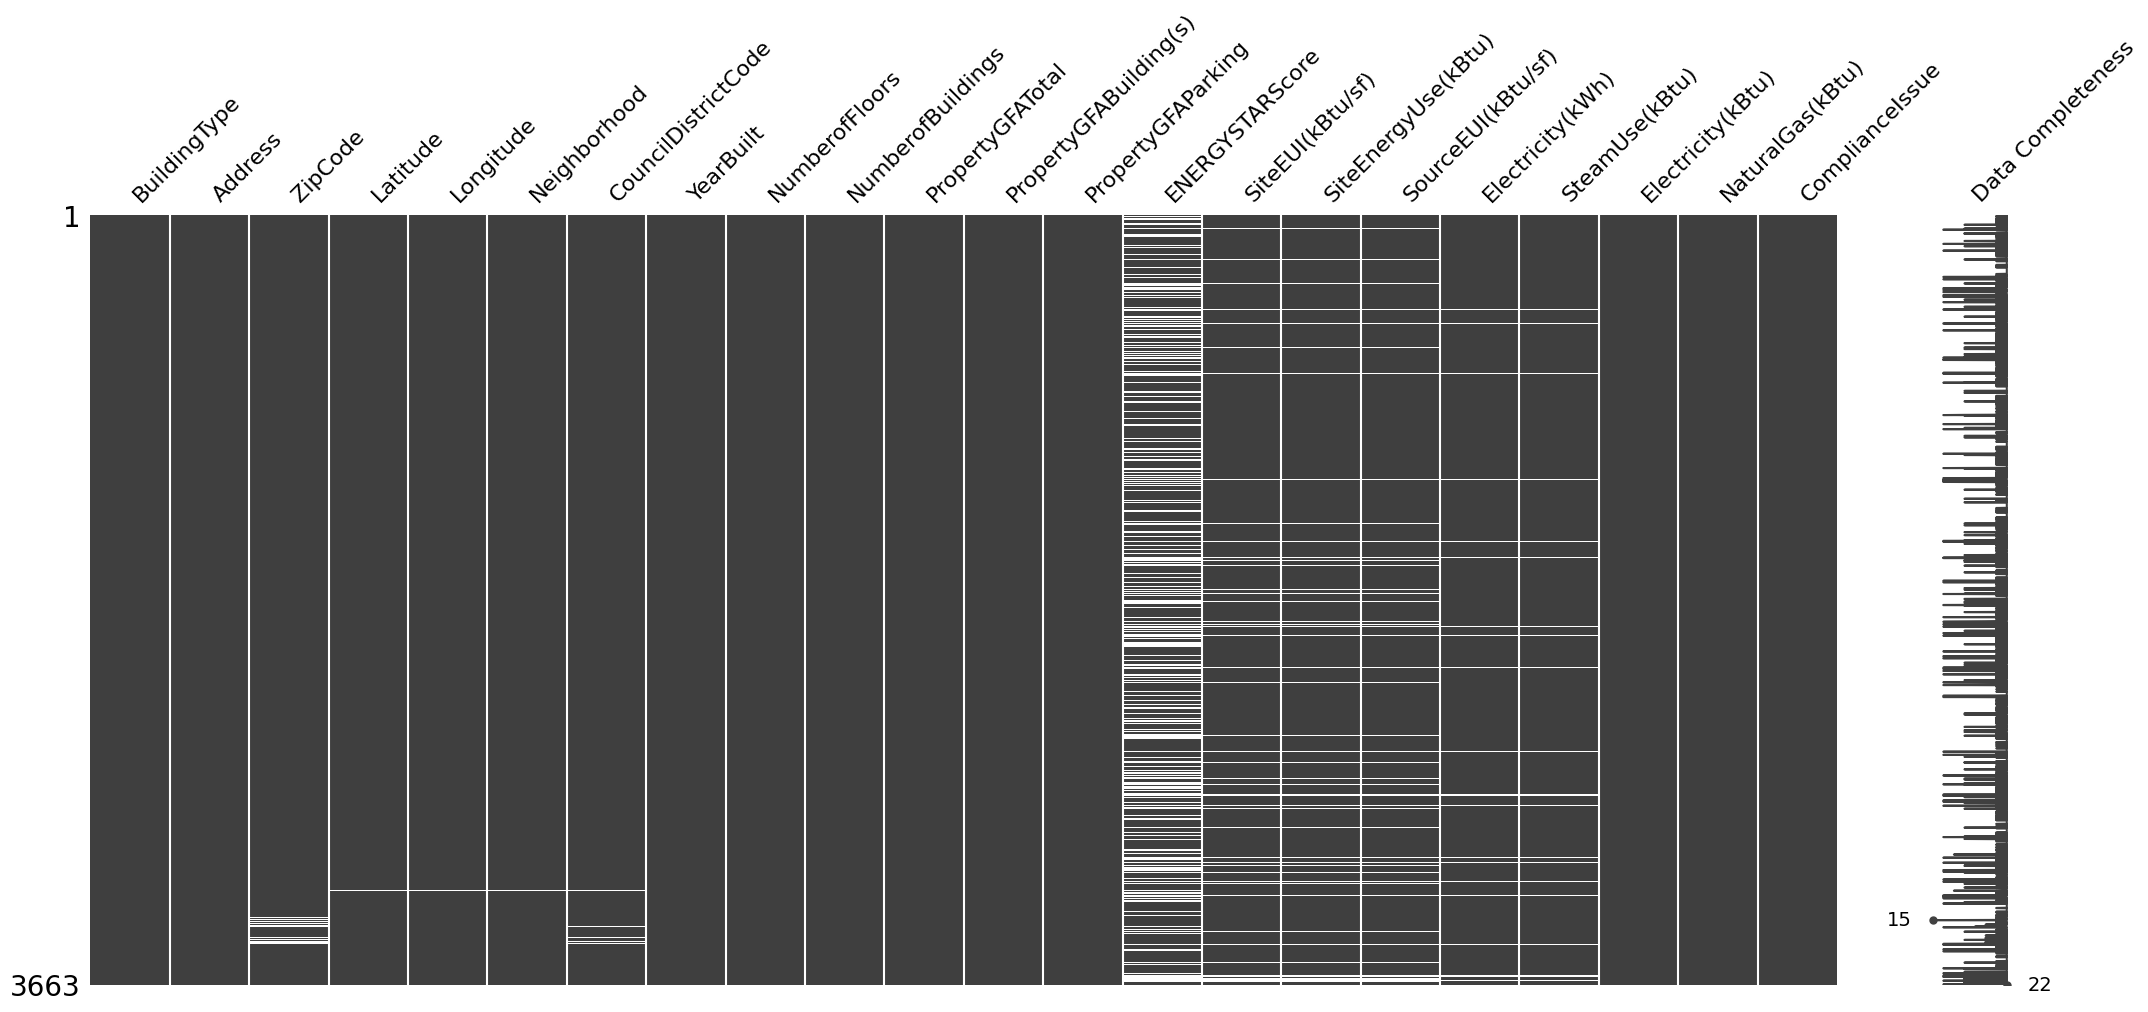

In [15]:
msno.matrix(data_subset, labels = True)

<Axes: >

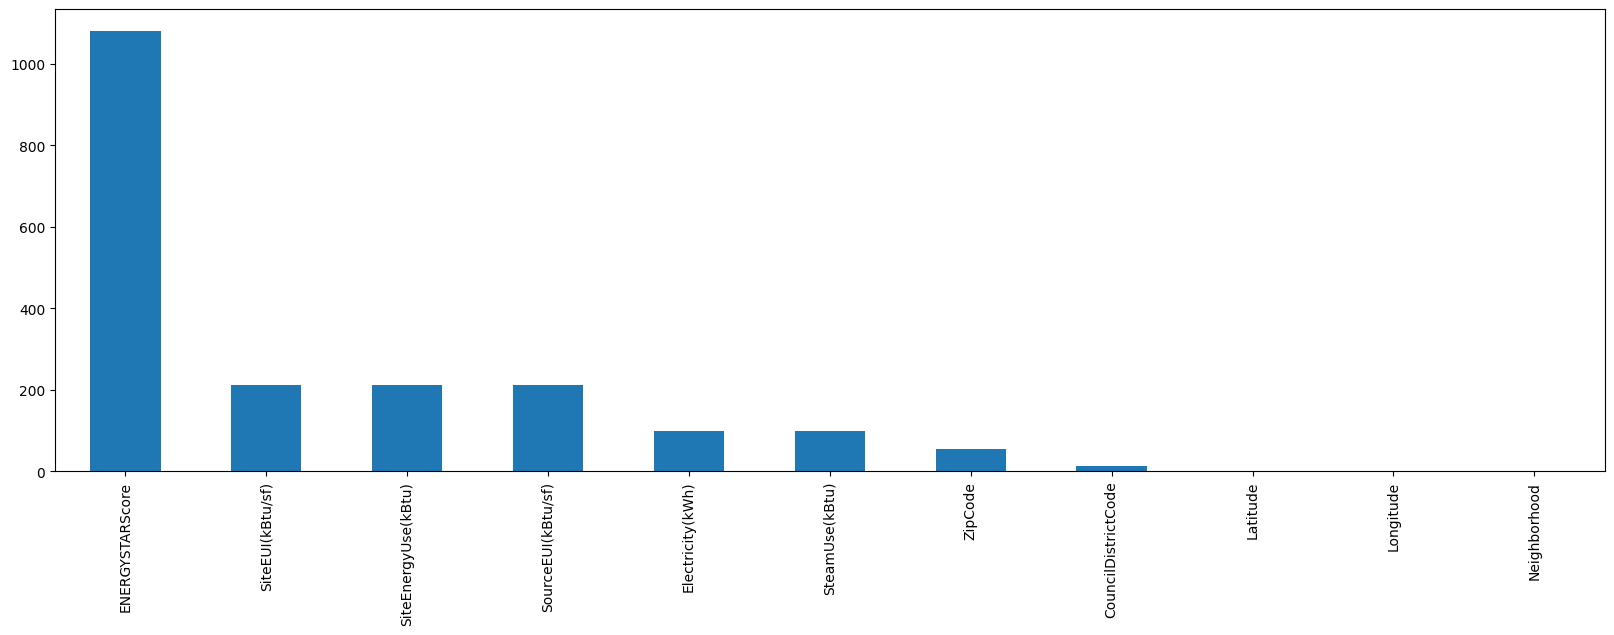

In [16]:
data_subset.isna().sum()[data_subset.isna().sum()>0].sort_values(ascending = False).plot(kind = 'bar', figsize = (20,6))

We can see EnergyScore is empty for almost 30% of the data. We can see how the values are stored in the Energy Score and then decide if we want to keep this in our dataset or not

In [17]:
#data_subset['ENERGYSTARScore'].describe()

In [18]:
#data_subset['ENERGYSTARScore'].plot()

#**I think we should delete this ????**

In [19]:
data_subset.BuildingType.describe()

count               3663
unique                 8
top       NonResidential
freq                1482
Name: BuildingType, dtype: object

In [20]:
# Create an instance of LabelEncoder
encoder = LabelEncoder()

# Fit and transform the 'BuildingType' column
data_subset['BuildingTypeEncoded'] = encoder.fit_transform(data_subset['BuildingType'])

# Print the unique encoded values
print(data_subset['BuildingTypeEncoded'].unique())


[4 5 3 7 0 2 1 6]


 Now lets see how it is encoded as per their corresponding labels

In [21]:
# Create a dictionary mapping encoded values to building types
building_type_mapping = dict(zip(data_subset['BuildingTypeEncoded'], data_subset['BuildingType']))

# Print the mapping
for encoded, building_type in building_type_mapping.items():
    print(f"{encoded}: {building_type}")


4: NonResidential
5: Nonresidential COS
3: Multifamily MR (5-9)
7: SPS-District K-12
0: Campus
2: Multifamily LR (1-4)
1: Multifamily HR (10+)
6: Nonresidential WA


In [22]:
# Drop the 'BuildingType' column
data_subset = data_subset.drop(['BuildingType','Address'], axis=1)

#data_subset.info()

In [23]:
data_subset.Neighborhood.describe()

count         3661
unique          20
top       DOWNTOWN
freq           612
Name: Neighborhood, dtype: object

In [24]:
# Fit and transform the 'BuildingType' column
data_subset['NeighborhoodEncoded'] = encoder.fit_transform(data_subset['Neighborhood'])

# Print the unique encoded values
print(data_subset['NeighborhoodEncoded'].unique())

[ 3 17  9  4 13  8  7  6  5  0 10  1 18  2 16 14 11 15 12 19 20]


In [25]:
# Create a dictionary mapping encoded values to building types
Neighborhood_type_mapping = dict(zip(data_subset['NeighborhoodEncoded'], data_subset['Neighborhood']))

# Print the mapping
for encoded, Neighborhood in Neighborhood_type_mapping.items():
    print(f"{encoded}: {Neighborhood}")

3: DOWNTOWN
17: SOUTHEAST
9: NORTHEAST
4: EAST
13: SHARED: CENTRAL & EAST
8: NORTH
7: MAGNOLIA / QUEEN ANNE
6: LAKE UNION
5: GREATER DUWAMISH
0: BALLARD
10: NORTHWEST
1: CENTRAL
18: SOUTHWEST
2: DELRIDGE NEIGHBORHOODS
16: SHARED: NORTH & NORTHWEST
14: SHARED: GREATER DUWAMISH & DELRIDGE NEIGHBORHOODS
11: SHARED: BALLARD & LAKE UNION
15: SHARED: LAKE UNION & NORTHWEST
12: SHARED: BALLARD & NORTHWEST
19: water
20: nan


In [26]:
data_subset = data_subset.drop('Neighborhood', axis=1)

# Remove rows with label 20 in 'NeighborhoodEncoded' column
data_subset = data_subset[data_subset['NeighborhoodEncoded'] != 20]

In [27]:
#data_subset.NeighborhoodEncoded.value_counts()

In [28]:
data_subset = data_subset.dropna()

In [29]:
data_subset = data_subset.reset_index(drop=True)
#data_subset.info()

In [30]:
#data_subset

In [31]:
# Fit and transform the 'BuildingType' column
data_subset['ComplianceIssueEncoded'] = encoder.fit_transform(data_subset['ComplianceIssue'])

# Print the unique encoded values
print(data_subset['ComplianceIssueEncoded'].unique())

[3 2 0 1 4 5]


In [32]:
# Create a dictionary mapping encoded values to building types
ComplianceIssue_type_mapping = dict(zip(data_subset['ComplianceIssueEncoded'], data_subset['ComplianceIssue']))

# Print the mapping
for encoded, ComplianceIssue in ComplianceIssue_type_mapping.items():
    print(f"{encoded}: {ComplianceIssue}")

data_subset = data_subset.drop('ComplianceIssue', axis=1)


3: No Issue
2: Missing 2021 EUI or Electricity Data
0: Account Requires Verification
1: Default Data
4: Portfolio Manager Account Not Shared
5: Unknown - Contact the Help Desk


In [33]:
# Handle missing values in 'ZipCode' column
data_subset['ZipCode'] = data_subset['ZipCode'].fillna(0)  # Fill NaN values with 0

# Convert 'ZipCode' column to integers
data_subset['ZipCode'] = data_subset['ZipCode'].astype(int)

# Remove rows with ZipCode equal to 0
data_subset = data_subset[data_subset['ZipCode'] != 0]

In [34]:
#data_subset.ZipCode.info()

In [35]:
#data_subset.info()

In [36]:
data_subset

,ZipCode,Latitude,Longitude,CouncilDistrictCode,YearBuilt,NumberofFloors,NumberofBuildings,PropertyGFATotal,PropertyGFABuilding(s),PropertyGFAParking,...,SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),SourceEUI(kBtu/sf),Electricity(kWh),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),BuildingTypeEncoded,NeighborhoodEncoded,ComplianceIssueEncoded
0,98101,47.61220,-122.33799,1.0,1927,12,1,88434,88434,0,...,73.599998,6510477.0,144.199997,944955.0,1798672.0,3224187,1487618,4,3,3
1,98101,47.61307,-122.33361,1.0,1996,11,1,103566,88502,15064,...,52.200001,4617104.0,99.099998,657478.0,0.0,2243315,2373789,4,3,3
2,98101,47.61367,-122.33822,1.0,1969,41,3,956110,759392,196718,...,46.500000,43953212.0,105.300003,8673722.0,10583473.0,29594739,3775000,4,3,3
3,98101,47.61412,-122.33664,1.0,1926,10,1,61320,61320,0,...,79.500000,4873753.0,136.000000,509497.0,1167770.0,1738403,1967580,4,3,3
4,98121,47.61375,-122.34047,1.0,1980,18,1,175580,113580,62000,...,92.000000,11358936.0,161.100006,1333597.0,0.0,4550233,6808702,4,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2527,98105,47.66517,-122.30186,1.0,2006,3,1,102290,59850,42440,...,56.700001,3618896.0,158.699997,1060638.0,0.0,3618897,0,4,9,3
2528,98105,47.66511,-122.30126,1.0,2006,3,1,62660,28060,34600,...,53.000000,1511269.0,135.899994,382675.0,0.0,1305686,205582,4,9,3
2529,98122,47.60826,-122.31195,1.0,2019,3,1,55728,55728,0,...,25.400000,767793.0,45.900002,97222.0,0.0,331720,436072,2,1,3
2530,98122,47.61784,-122.32439,1.0,2020,7,1,36122,36122,0,...,29.700001,1074543.0,68.000000,222388.0,0.0,758789,315754,3,4,3


#Supervised Learning

In [37]:
data_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2532 entries, 0 to 2531
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ZipCode                 2532 non-null   int64  
 1   Latitude                2532 non-null   float64
 2   Longitude               2532 non-null   float64
 3   CouncilDistrictCode     2532 non-null   float64
 4   YearBuilt               2532 non-null   int64  
 5   NumberofFloors          2532 non-null   int64  
 6   NumberofBuildings       2532 non-null   int64  
 7   PropertyGFATotal        2532 non-null   int64  
 8   PropertyGFABuilding(s)  2532 non-null   int64  
 9   PropertyGFAParking      2532 non-null   int64  
 10  ENERGYSTARScore         2532 non-null   float64
 11  SiteEUI(kBtu/sf)        2532 non-null   float64
 12  SiteEnergyUse(kBtu)     2532 non-null   float64
 13  SourceEUI(kBtu/sf)      2532 non-null   float64
 14  Electricity(kWh)        2532 non-null   

In the Supervised learning, we will try to predict the energy consumption of the building based on various parameters like year built,location,,blabla

Now, the interesting thing to note is we need to ignore certains columns which are direclty correlated with our target variable(energy(kbtu)).

<Axes: >

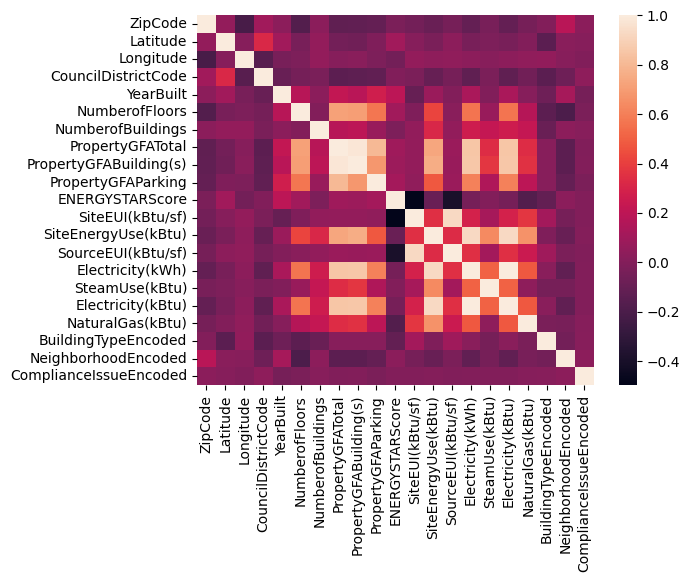

In [38]:
sns.heatmap(data_subset.corr())


In [39]:
correlation = data_subset.corr()
# Set the correlation threshold
correlation_threshold = 0.8

# Iterate through the correlation matrix and identify column pairs with high correlation
high_correlation_pairs = []
for col1 in correlation.columns:
    for col2 in correlation.columns:
        if col1 != col2 and abs(correlation.loc[col1, col2]) > correlation_threshold:
          if (col1,col2) or (col2,col1) not in high_correlation_pairs:
            high_correlation_pairs.append((col1, col2))

# Print the pairs of columns with high correlation
for pair in high_correlation_pairs:
    print(pair)

('PropertyGFATotal', 'PropertyGFABuilding(s)')
('PropertyGFATotal', 'PropertyGFAParking')
('PropertyGFATotal', 'Electricity(kWh)')
('PropertyGFATotal', 'Electricity(kBtu)')
('PropertyGFABuilding(s)', 'PropertyGFATotal')
('PropertyGFABuilding(s)', 'Electricity(kWh)')
('PropertyGFABuilding(s)', 'Electricity(kBtu)')
('PropertyGFAParking', 'PropertyGFATotal')
('SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)')
('SiteEnergyUse(kBtu)', 'Electricity(kWh)')
('SiteEnergyUse(kBtu)', 'Electricity(kBtu)')
('SourceEUI(kBtu/sf)', 'SiteEUI(kBtu/sf)')
('Electricity(kWh)', 'PropertyGFATotal')
('Electricity(kWh)', 'PropertyGFABuilding(s)')
('Electricity(kWh)', 'SiteEnergyUse(kBtu)')
('Electricity(kWh)', 'Electricity(kBtu)')
('Electricity(kBtu)', 'PropertyGFATotal')
('Electricity(kBtu)', 'PropertyGFABuilding(s)')
('Electricity(kBtu)', 'SiteEnergyUse(kBtu)')
('Electricity(kBtu)', 'Electricity(kWh)')


We need to consider only columns which are explaining variance in the dataset. It's better to remove these columns from our dataset and see what needs to be done. 

In [40]:
# Select the subset of data with the desired columns
# Select the desired columns
selected_supervised_columns = [
    
      'ZipCode', 'Latitude', 'Longitude', 'CouncilDistrictCode', 
      'YearBuilt','NumberofFloors', 'NumberofBuildings', 'PropertyGFATotal',
      'PropertyGFABuilding(s)', 'PropertyGFAParking', 'ENERGYSTARScore','SiteEUI(kBtu/sf)', 
      'SiteEnergyUse(kBtu)',  'BuildingTypeEncoded', 'NeighborhoodEncoded','ComplianceIssueEncoded'
      
      ]
data_supervised = data_subset[selected_supervised_columns].copy()

We can see that many columns are correlated. It will be good to remove those columns from our dataset.

In [41]:
data_supervised.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2532 entries, 0 to 2531
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ZipCode                 2532 non-null   int64  
 1   Latitude                2532 non-null   float64
 2   Longitude               2532 non-null   float64
 3   CouncilDistrictCode     2532 non-null   float64
 4   YearBuilt               2532 non-null   int64  
 5   NumberofFloors          2532 non-null   int64  
 6   NumberofBuildings       2532 non-null   int64  
 7   PropertyGFATotal        2532 non-null   int64  
 8   PropertyGFABuilding(s)  2532 non-null   int64  
 9   PropertyGFAParking      2532 non-null   int64  
 10  ENERGYSTARScore         2532 non-null   float64
 11  SiteEUI(kBtu/sf)        2532 non-null   float64
 12  SiteEnergyUse(kBtu)     2532 non-null   float64
 13  BuildingTypeEncoded     2532 non-null   int64  
 14  NeighborhoodEncoded     2532 non-null   

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from imblearn.combine import SMOTETomek
from lazypredict.Supervised import LazyRegressor

In [43]:
data = data_supervised
x = data.copy();
x.drop('SiteEnergyUse(kBtu)',axis = 1,inplace = True)
#x = data[['SiteEUI(kBtu/sf)','SteamUse(kBtu)','Electricity(kBtu)','NaturalGas(kBtu)']]
y = data['SiteEnergyUse(kBtu)']

In [44]:
smk = SMOTETomek(random_state=123)
x_res , y_res = smk.fit_resample(x,y)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.3,random_state=0)
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [46]:
#data.isna().sum()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2532 entries, 0 to 2531
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ZipCode                 2532 non-null   int64  
 1   Latitude                2532 non-null   float64
 2   Longitude               2532 non-null   float64
 3   CouncilDistrictCode     2532 non-null   float64
 4   YearBuilt               2532 non-null   int64  
 5   NumberofFloors          2532 non-null   int64  
 6   NumberofBuildings       2532 non-null   int64  
 7   PropertyGFATotal        2532 non-null   int64  
 8   PropertyGFABuilding(s)  2532 non-null   int64  
 9   PropertyGFAParking      2532 non-null   int64  
 10  ENERGYSTARScore         2532 non-null   float64
 11  SiteEUI(kBtu/sf)        2532 non-null   float64
 12  SiteEnergyUse(kBtu)     2532 non-null   float64
 13  BuildingTypeEncoded     2532 non-null   int64  
 14  NeighborhoodEncoded     2532 non-null   

In [47]:
clf = LazyRegressor( ignore_warnings=True)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 42/42 [01:06<00:00,  1.58s/it]


In [48]:
print(models)

                               Adjusted R-Squared  R-Squared        RMSE  \
Model                                                                      
ExtraTreesRegressor                          0.96       0.96  1571337.66   
HistGradientBoostingRegressor                0.90       0.91  2444877.06   
LGBMRegressor                                0.89       0.90  2561472.90   
GradientBoostingRegressor                    0.88       0.89  2659162.75   
KNeighborsRegressor                          0.76       0.77  3798253.39   
ExtraTreeRegressor                           0.73       0.74  4066875.65   
ElasticNet                                   0.72       0.74  4067385.63   
TweedieRegressor                             0.71       0.73  4160718.31   
SGDRegressor                                 0.69       0.70  4338974.53   
LassoCV                                      0.67       0.69  4446900.43   
LassoLarsIC                                  0.67       0.69  4455656.21   
LarsCV      

So, Now we will perform linear regression as it has low mean square error....

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Assuming you have already preprocessed your dataset and split it into features (x) and target variable (y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# Perform feature scaling if necessary
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
# You can use appropriate evaluation metrics for your regression task, such as mean squared error (MSE) or R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("R-squared:", r2)


R-squared: 0.6492318500730185


In [52]:
data_supervised.columns

Index(['ZipCode', 'Latitude', 'Longitude', 'CouncilDistrictCode', 'YearBuilt',
       'NumberofFloors', 'NumberofBuildings', 'PropertyGFATotal',
       'PropertyGFABuilding(s)', 'PropertyGFAParking', 'ENERGYSTARScore',
       'SiteEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'BuildingTypeEncoded',
       'NeighborhoodEncoded', 'ComplianceIssueEncoded'],
      dtype='object')

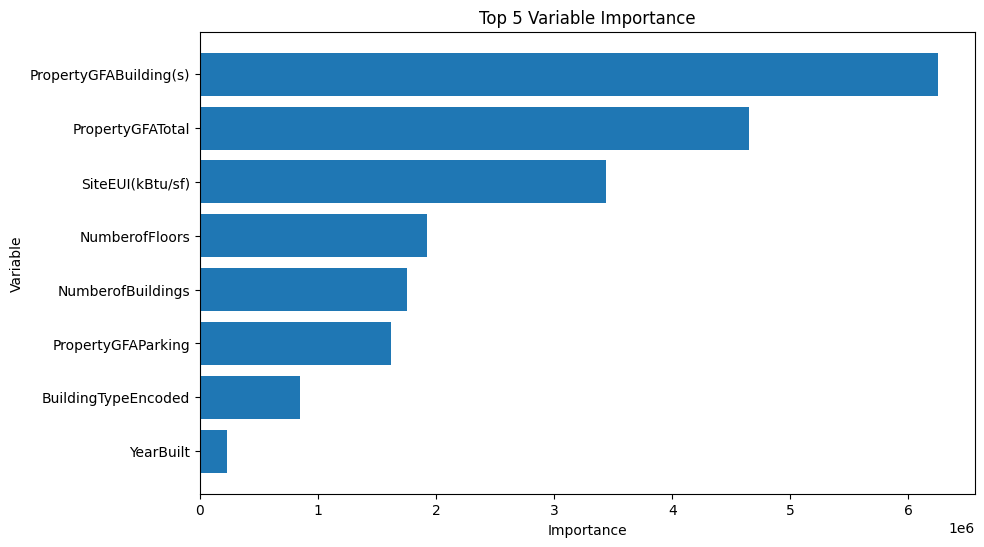

In [58]:
# Get variable importance values
importance_values = np.abs(model.coef_)

# Get variable names
variable_names = ['ZipCode', 'Latitude', 'Longitude', 'CouncilDistrictCode', 'YearBuilt',
       'NumberofFloors', 'NumberofBuildings', 'PropertyGFATotal',
       'PropertyGFABuilding(s)', 'PropertyGFAParking', 'ENERGYSTARScore',
       'SiteEUI(kBtu/sf)',  'BuildingTypeEncoded',
       'NeighborhoodEncoded', 'ComplianceIssueEncoded']




# Sort variables based on importance in descending order
sorted_indices = np.argsort(importance_values)[::-1]
sorted_variable_names = [variable_names[i] for i in sorted_indices]
sorted_importance_values = importance_values[sorted_indices]

# Select top 5 variables
top_indices = sorted_indices[:8]
top_variable_names = [variable_names[i] for i in top_indices]
top_importance_values = sorted_importance_values[:8]

# Plot variable importance horizontally for top 5 variables
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_importance_values)), top_importance_values)
plt.xlabel("Importance")
plt.ylabel("Variable")
plt.title("Top 5 Variable Importance")
plt.yticks(range(len(top_importance_values)), top_variable_names)
plt.gca().invert_yaxis()
plt.show()

#Unsupervised Learning

In [59]:
# Standardize the data by centering and scaling
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_subset)

# Perform PCA
pca = PCA()
pca_out = pca.fit_transform(data_scaled)

In [60]:
pd.DataFrame({'Center': scaler.mean_
                   , 'Scale': scaler.scale_}
                  , index=data_subset.columns)

,Center,Scale
ZipCode,98116.54,17.07
Latitude,47.63,0.05
Longitude,-122.33,0.03
CouncilDistrictCode,2.86,2.26
YearBuilt,1975.13,32.94
NumberofFloors,5.49,6.29
NumberofBuildings,1.09,0.79
PropertyGFATotal,109007.80,176637.13
PropertyGFABuilding(s),91893.13,142184.56
PropertyGFAParking,17114.67,45973.95


In [61]:
print("Number of Principal Components:", pca.n_components_)

Number of Principal Components: 21


In [62]:
pca_out.shape

(2532, 21)

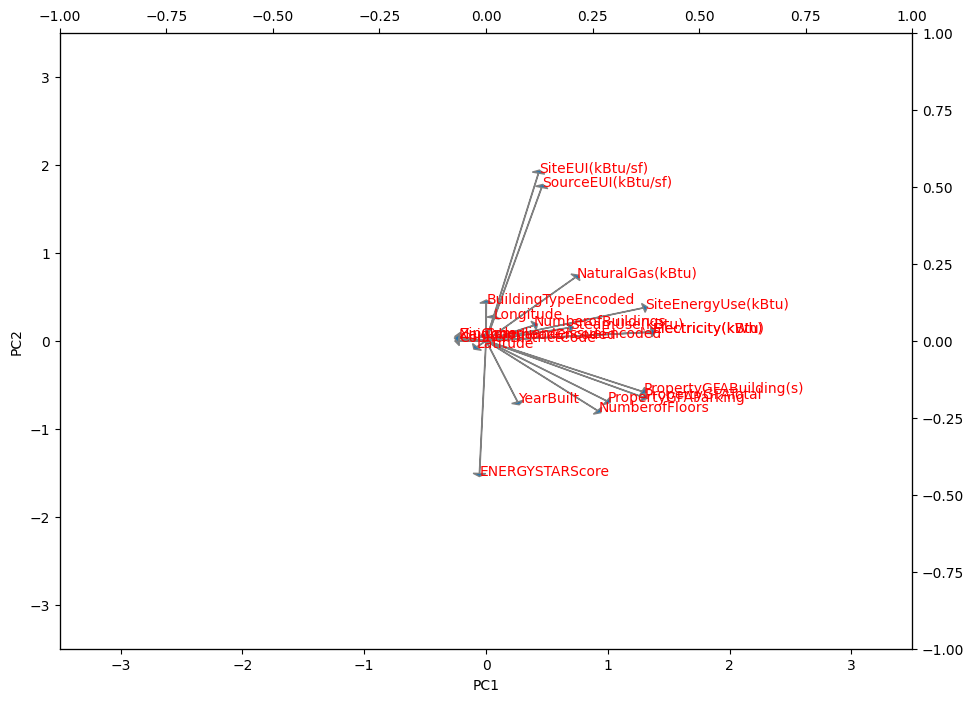

In [63]:
fig , ax1 = plt.subplots(figsize=(11,8))

ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)

'''# Plot states names for PC1 and PC2
for i, label in enumerate(USArrests.index.to_list()):
    ax1.annotate(label, (pca_out[i,0], pca_out[i,1]))'''

# Plot Principal Component loading vectors using a twin axis.
ax2 = ax1.twinx().twiny() 
ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)

# Plot principal components as arrows
for i, (comp, var) in enumerate(zip(pca.components_.T, data_subset.columns)):
    ax2.arrow(0, 0, comp[0], comp[1], head_width=0.03, head_length=0.01,  ec='gray')
    ax2.text(comp[0]*1.01, comp[1]*1.01, var, color='r')


ax1.set_xlabel("PC1")
ax1.set_ylabel("PC2");

(0.0, 1.03)

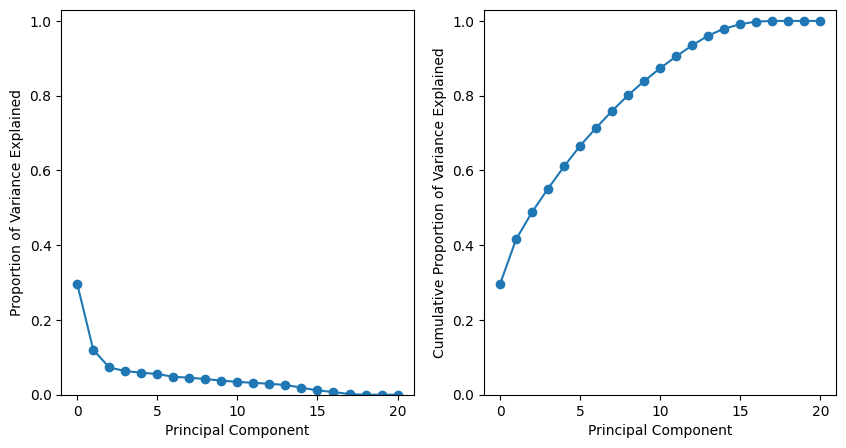

In [64]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot of proportion of variance explained
ax[0].plot(pca.explained_variance_ratio_, marker='o')
ax[0].set_xlabel('Principal Component')
ax[0].set_ylabel('Proportion of Variance Explained')
ax[0].set_ylim(0, 1.03)


# Plot of cumulative proportion of variance explained
ax[1].plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
ax[1].set_xlabel('Principal Component')
ax[1].set_ylabel('Cumulative Proportion of Variance Explained')
ax[1].set_ylim(0, 1.03)


We can see 82% of the variance is explained by almost 10 columns we might need to rethink on what to do with rest of the data

One way would be by setting a 70% or 65% threshold and take the variables that fall below 70% accordingly.


In [65]:
cluster_data = KMeans(n_clusters=3, n_init=20)
cluster_data.fit(data_subset)

KMeans(n_clusters=3, n_init=20)

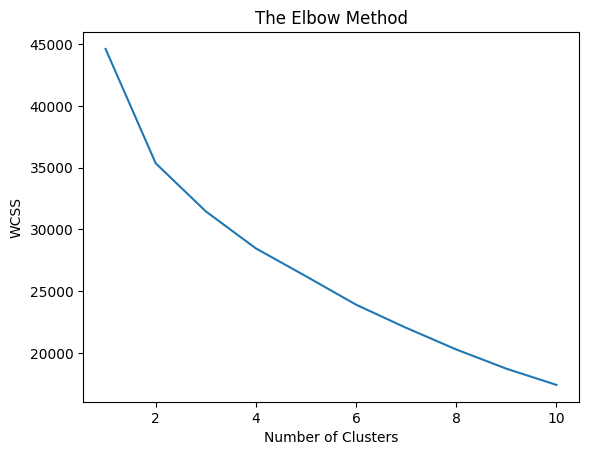

In [66]:
data_subset.dropna(inplace=True)  # Remove rows with missing values

# Feature Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_subset)


pca = PCA(n_components=10)  
pca_data = pca.fit_transform(scaled_data)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(pca_data)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [67]:
cluster_data = KMeans(n_clusters=4, n_init=15)
cluster_data.fit(data_subset)

KMeans(n_clusters=4, n_init=15)

In [68]:
pd.DataFrame(cluster_data.labels_).value_counts()

0    2212
3     265
2      51
1       4
dtype: int64

In [69]:
data_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2532 entries, 0 to 2531
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ZipCode                 2532 non-null   int64  
 1   Latitude                2532 non-null   float64
 2   Longitude               2532 non-null   float64
 3   CouncilDistrictCode     2532 non-null   float64
 4   YearBuilt               2532 non-null   int64  
 5   NumberofFloors          2532 non-null   int64  
 6   NumberofBuildings       2532 non-null   int64  
 7   PropertyGFATotal        2532 non-null   int64  
 8   PropertyGFABuilding(s)  2532 non-null   int64  
 9   PropertyGFAParking      2532 non-null   int64  
 10  ENERGYSTARScore         2532 non-null   float64
 11  SiteEUI(kBtu/sf)        2532 non-null   float64
 12  SiteEnergyUse(kBtu)     2532 non-null   float64
 13  SourceEUI(kBtu/sf)      2532 non-null   float64
 14  Electricity(kWh)        2532 non-null   

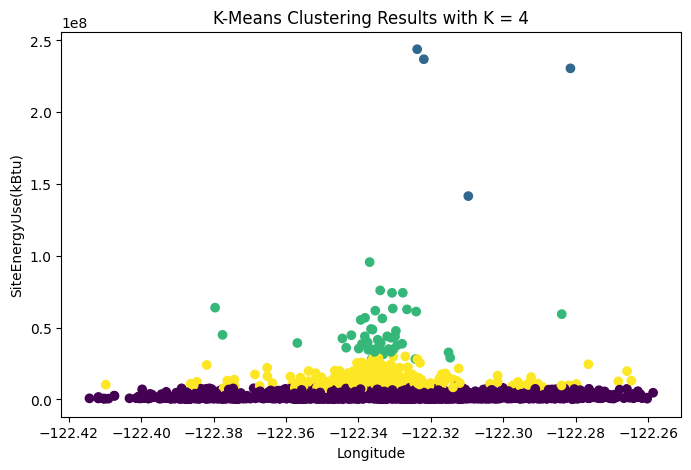

In [70]:
plt.figure(figsize=(8,5))

x_label,y_label = data_subset.columns[2], data_subset.columns[12]

plt.scatter(data_subset.iloc[:,2], data_subset.iloc[:,12], c = cluster_data.labels_) 
plt.title('K-Means Clustering Results with K = 4')
plt.xlabel(x_label)
plt.ylabel(y_label)

plt.show()


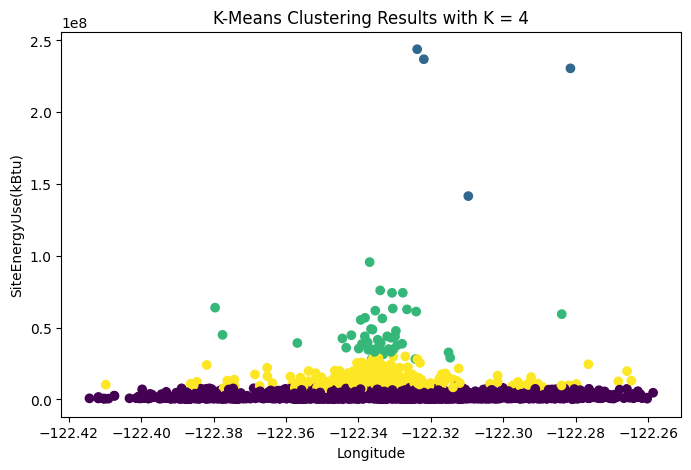

In [71]:
plt.figure(figsize=(8,5))

x= 'Longitude'

y= 'SiteEnergyUse(kBtu)'

x_label,y_label = x, y

plt.scatter(data_subset.loc[:,x], data_subset.loc[:,y], c = cluster_data.labels_) 
plt.title('K-Means Clustering Results with K = 4')
plt.xlabel(x_label)
plt.ylabel(y_label)

plt.show()


<Figure size 800x500 with 0 Axes>

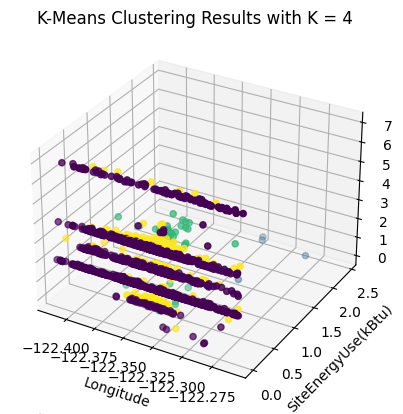

In [72]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.figure(figsize=(8, 5))

x_label = 'Longitude'
y_label = 'SiteEnergyUse(kBtu)'
z_label = 'BuildingTypeEncoded'

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data_subset.loc[:, x_label], data_subset.loc[:, y_label], data_subset.loc[:, z_label], c=cluster_data.labels_)
ax.set_title('K-Means Clustering Results with K = 4')
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
ax.set_zlabel(z_label)

plt.show()


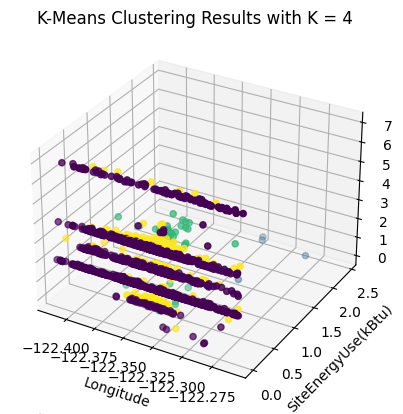

In [73]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.ion()

x_label = data_subset.columns[2]
y_label = data_subset.columns[12]
z_label = data_subset.columns[18]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data_subset.iloc[:, 2], data_subset.iloc[:, 12], data_subset.iloc[:, 18], c=cluster_data.labels_)
ax.set_title('K-Means Clustering Results with K = 4')
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
ax.set_zlabel(z_label)

plt.show()

In [74]:

data_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2532 entries, 0 to 2531
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ZipCode                 2532 non-null   int64  
 1   Latitude                2532 non-null   float64
 2   Longitude               2532 non-null   float64
 3   CouncilDistrictCode     2532 non-null   float64
 4   YearBuilt               2532 non-null   int64  
 5   NumberofFloors          2532 non-null   int64  
 6   NumberofBuildings       2532 non-null   int64  
 7   PropertyGFATotal        2532 non-null   int64  
 8   PropertyGFABuilding(s)  2532 non-null   int64  
 9   PropertyGFAParking      2532 non-null   int64  
 10  ENERGYSTARScore         2532 non-null   float64
 11  SiteEUI(kBtu/sf)        2532 non-null   float64
 12  SiteEnergyUse(kBtu)     2532 non-null   float64
 13  SourceEUI(kBtu/sf)      2532 non-null   float64
 14  Electricity(kWh)        2532 non-null   

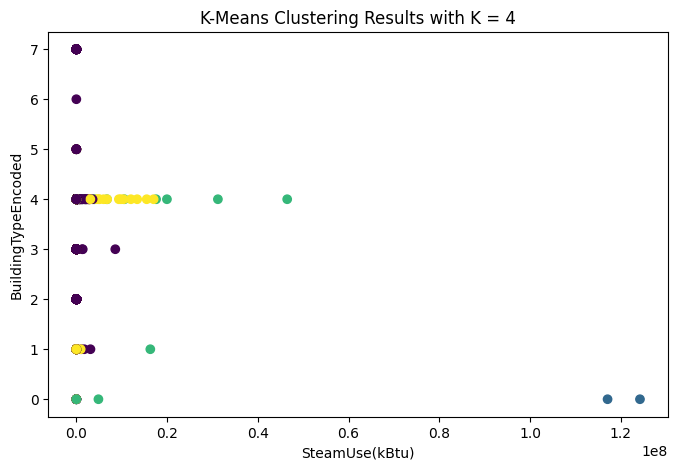

In [75]:
plt.figure(figsize=(8,5))

x = 'SteamUse(kBtu)'
y = 'BuildingTypeEncoded'
x_label,y_label = x, y


plt.scatter(data_subset.loc[:,x], data_subset.loc[:,y], c = cluster_data.labels_) 
plt.title('K-Means Clustering Results with K = 4')
plt.xlabel(x_label)
plt.ylabel(y_label)

plt.show()


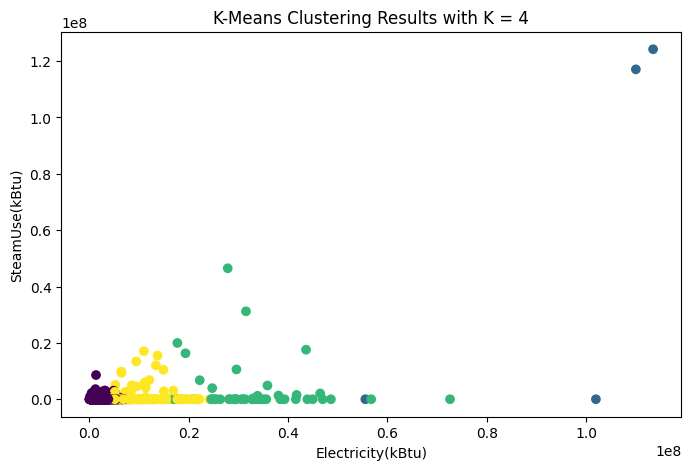

In [76]:
plt.figure(figsize=(8,5))

x= 'Electricity(kBtu)'

y= 'SteamUse(kBtu)'

x_label,y_label = x, y

plt.scatter(data_subset.loc[:,x], data_subset.loc[:,y], c = cluster_data.labels_) 
plt.title('K-Means Clustering Results with K = 4')
plt.xlabel(x_label)
plt.ylabel(y_label)

plt.show()


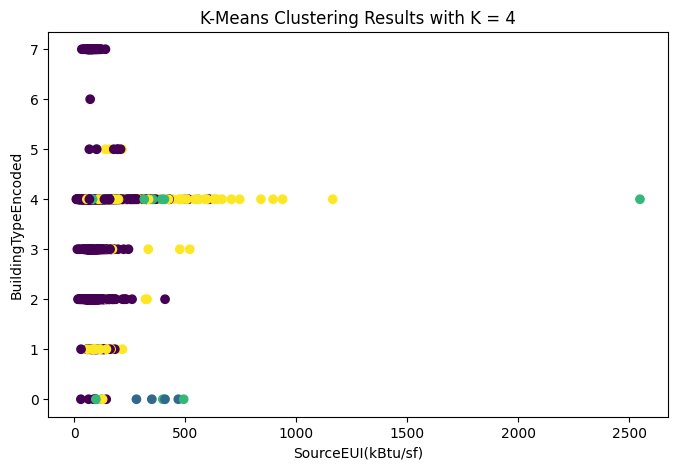

In [77]:
plt.figure(figsize=(8,5))

x_label,y_label = data_subset.columns[13], data_subset.columns[18]

plt.scatter(data_subset.iloc[:,13], data_subset.iloc[:,18], c = cluster_data.labels_) 
plt.title('K-Means Clustering Results with K = 4')
plt.xlabel(x_label)
plt.ylabel(y_label)

plt.show()


Hierarchial Clustering

In [78]:
hc_complete = linkage(pdist(data_subset), method='complete')

In [79]:
hc_avg = linkage(pdist(data_subset), method='average')
hc_single = linkage(pdist(data_subset), method='single')

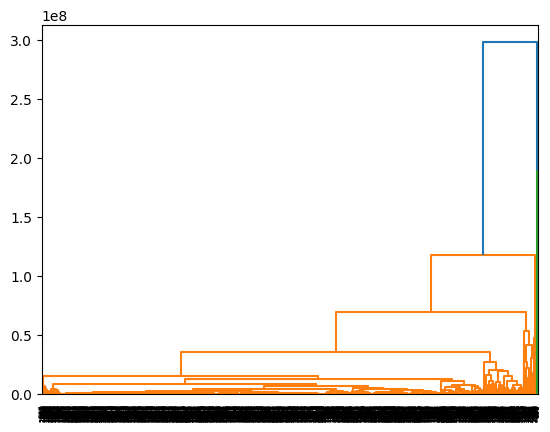

In [80]:
dendrogram(hc_complete);

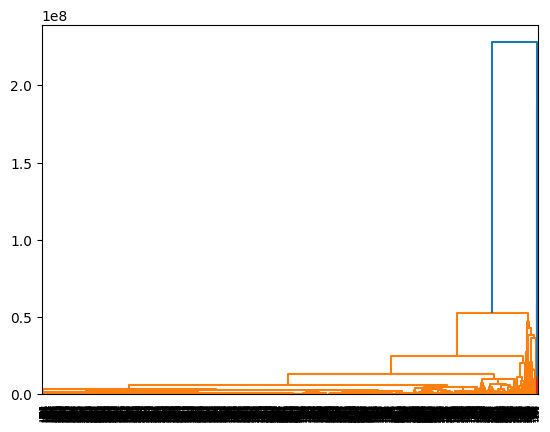

In [81]:
dendrogram(hc_avg);

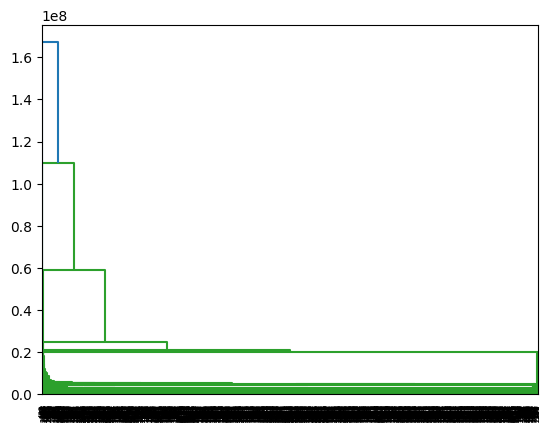

In [82]:
dendrogram(hc_single);

Else by comprehensive analysis if data domain we can get to know that :

Targeted Recommendations: Unsupervised learning can enable the identification of energy-saving strategies tailored to specific building clusters. For example, if a cluster of buildings exhibits high energy consumption during certain periods, such as peak demand hours, targeted recommendations can be made to reduce energy usage during those times.

Energy Efficiency Insights: The clusters obtained through unsupervised learning can provide valuable insights into energy efficiency. You can analyze the characteristics of each cluster and identify factors that contribute to high or low energy consumption. This information can help stakeholders understand the key drivers of energy efficiency in different types of buildings and identify opportunities for improvement.

